<a href="https://colab.research.google.com/github/sammainahkinya1404/Topic_clustering/blob/main/Final_Hybrid_LDA_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/metadata.csv")
data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
2,le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350.0,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


In [ ]:
# Dropping unnecessary columns
columns_to_drop = ['cord_uid', 'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_pdf_parse', 'has_pmc_xml_parse', 'full_text_file', 'url', 'journal', 'publish_time', 'authors']
new_data = data.drop(columns_to_drop, axis=1)

# Dropping null values
new_df = new_data.dropna()


In [ ]:
# Text preprocessing function
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    processed_text = ' '.join(stemmed_tokens)
    return processed_text

new_data_40k = new_df.head(25000)
new_data_40k['title'] = new_data_40k['title'].apply(preprocess_text)
new_data_40k['abstract'] = new_data_40k['abstract'].apply(preprocess_text)

In [ ]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = new_data_40k['title'].tolist() + new_data_40k['abstract'].tolist()
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
terms = tfidf_vectorizer.get_feature_names_out()


In [ ]:
# Topic modeling using LDA with hyperparameter tuning
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

param_grid = {'n_components': [5,10,15]}
lda_model = LatentDirichletAllocation()
grid_search = GridSearchCV(lda_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(tfidf_matrix)

optimal_lda_model = LatentDirichletAllocation(n_components=grid_search.best_params_['n_components'], random_state=42)
optimal_lda_output = optimal_lda_model.fit_transform(tfidf_matrix)

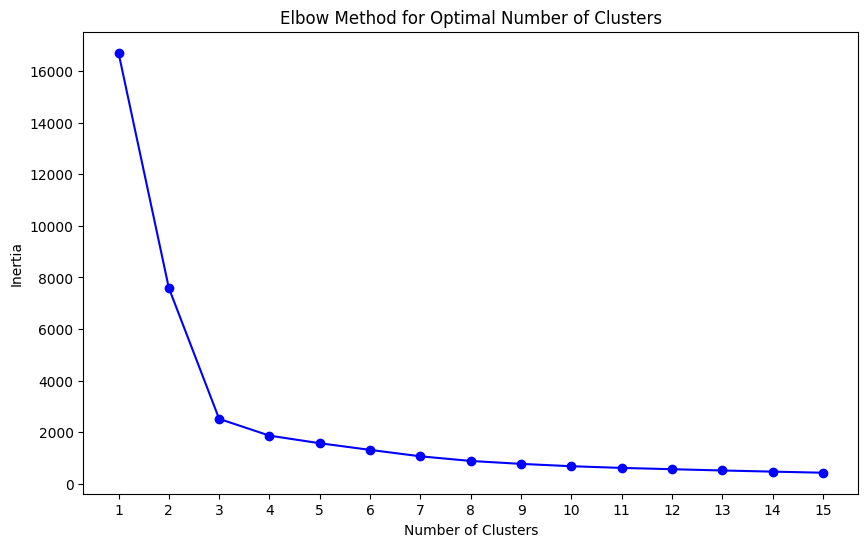

In [ ]:
# Topic display and word cloud visualization (as per your original code)

# Clustering using K-means on LDA output
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

max_clusters = 15
clusters_range = range(1, max_clusters + 1)
inertia_values = []

for num_clusters in clusters_range:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_model.fit(optimal_lda_output)
    inertia_values.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(clusters_range)
plt.show()

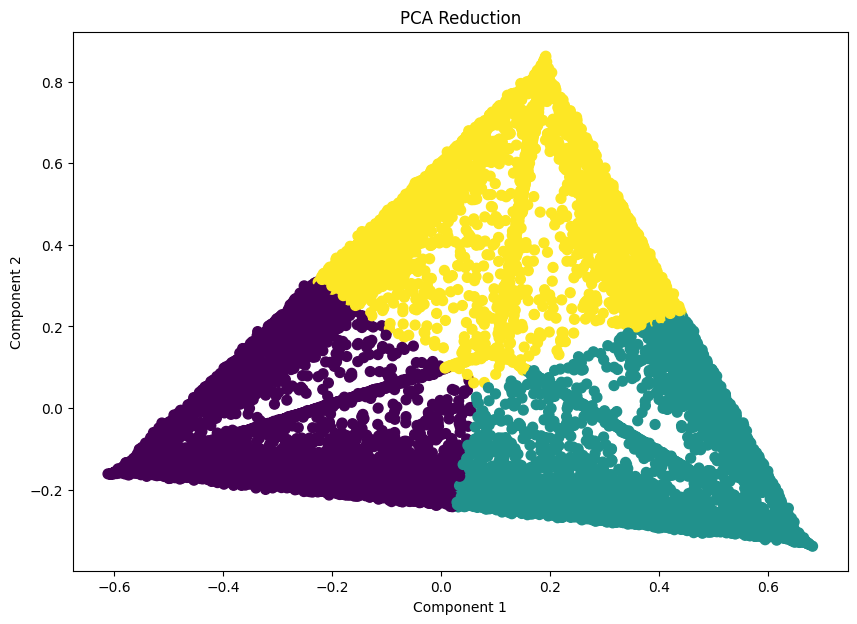

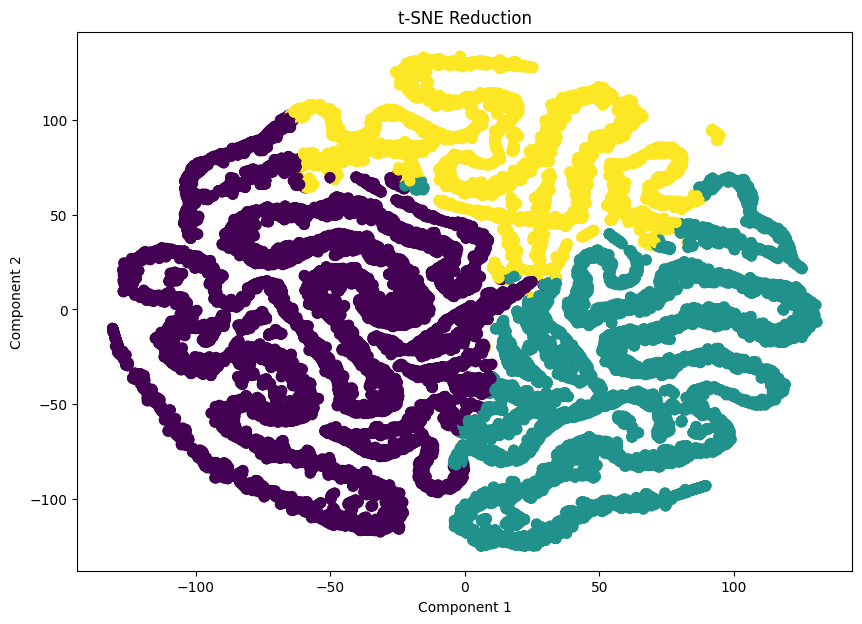

In [ ]:
num_clusters = 3
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(optimal_lda_output)
cluster_labels = kmeans_model.labels_
new_data_40k['cluster'] = cluster_labels[:25000]

# Dimensionality reduction for visualization (PCA and t-SNE)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2, random_state=42)
lda_output_2d = pca.fit_transform(optimal_lda_output)

tsne = TSNE(n_components=2, random_state=42)
lda_output_tsne = tsne.fit_transform(optimal_lda_output)

def plot_dimensionality_reduction(data, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], data[:, 1], s=50, c=cluster_labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

plot_dimensionality_reduction(lda_output_2d, 'PCA Reduction')
plot_dimensionality_reduction(lda_output_tsne, 't-SNE Reduction')

In [ ]:
# Performance metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def print_metrics(labels, data, title):
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin_avg = davies_bouldin_score(data, labels)
    calinski_harabasz_avg = calinski_harabasz_score(data, labels)
    print(f"Metrics for {title}:")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_avg:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.4f}")

# print_metrics(cluster_labels, optimal_lda_output, "LDA + K-means")

In [ ]:
!pip install gensim

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

In [ ]:
# Coherence score computation
def compute_coherence_score(model, texts, dictionary, coherence='c_v'):
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
    coherence_score = coherence_model.get_coherence()
    return coherence_score

In [ ]:
# Convert text data to gensim format
tokenized_texts = [text.split() for text in new_data_40k['abstract']]
dictionary = corpora.Dictionary(tokenized_texts)
corpus_gensim = [dictionary.doc2bow(text) for text in tokenized_texts]


In [ ]:
# Coherence score for LDA
import gensim # import the gensim module

lda_model_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus_gensim, num_topics=grid_search.best_params_['n_components'], id2word=dictionary, random_state=42)
lda_coherence = compute_coherence_score(lda_model_gensim, tokenized_texts, dictionary)

print(f"LDA Coherence Score: {lda_coherence:.4f}")

LDA Coherence Score: 0.4062


In [ ]:
# Additional topic modeling and clustering techniques

# Plain LDA
plain_lda_model = LatentDirichletAllocation(n_components=grid_search.best_params_['n_components'], random_state=42)
plain_lda_output = plain_lda_model.fit_transform(tfidf_matrix)
plain_lda_kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
plain_lda_kmeans_labels = plain_lda_kmeans_model.fit_predict(plain_lda_output)
print_metrics(plain_lda_kmeans_labels, plain_lda_output, "LDA + K-means")

Metrics for LDA + K-means:
Silhouette Score: 0.7194
Davies-Bouldin Index: 0.4454
Calinski-Harabasz Index: 140872.8767


In [ ]:
# Non-negative Matrix Factorization (NMF)
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=grid_search.best_params_['n_components'], random_state=42)
nmf_output = nmf_model.fit_transform(tfidf_matrix)
nmf_kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
nmf_kmeans_labels = nmf_kmeans_model.fit_predict(nmf_output)
print_metrics(nmf_kmeans_labels, nmf_output, "NMF + K-means")

Metrics for NMF + K-means:
Silhouette Score: 0.2688
Davies-Bouldin Index: 1.4027
Calinski-Harabasz Index: 14129.4853


In [ ]:
# Coherence score for NMF
nmf_model_gensim = gensim.models.nmf.Nmf(corpus=corpus_gensim, num_topics=grid_search.best_params_['n_components'], id2word=dictionary, random_state=42)
nmf_coherence = compute_coherence_score(nmf_model_gensim, tokenized_texts, dictionary)
print(f"NMF Coherence Score: {nmf_coherence:.4f}")

NMF Coherence Score: 0.4803


In [ ]:
# Qualitative analysis
def display_topics(model, feature_names, num_top_words):
    topics = model.components_
    for topic_idx, topic in enumerate(topics):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

print("LDA Topics:")
display_topics(optimal_lda_model, tfidf_vectorizer.get_feature_names_out(), 10)

LDA Topics:
Topic #0:
vaccin viru bat protein human antibodi sequenc genom use host
Topic #1:
respiratori infect diseas viru influenza patient health detect clinic infecti
Topic #2:
angiotensin transplant ace2 stem cell convert hematopoiet lung ang recipi
Topic #3:
cell viru protein infect viral activ rna replic express immun
Topic #4:
de la und en der pmo die von glycyrrhiza el


In [ ]:
print("Plain LDA Topics:")
display_topics(plain_lda_model, tfidf_vectorizer.get_feature_names_out(), 10)


Plain LDA Topics:
Topic #0:
vaccin viru bat protein human antibodi sequenc genom use host
Topic #1:
respiratori infect diseas viru influenza patient health detect clinic infecti
Topic #2:
angiotensin transplant ace2 stem cell convert hematopoiet lung ang recipi
Topic #3:
cell viru protein infect viral activ rna replic express immun
Topic #4:
de la und en der pmo die von glycyrrhiza el


In [ ]:
print("NMF Topics:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10)

NMF Topics:
Topic #0:
cell infect immun respons mous vaccin induc express ifn activ
Topic #1:
influenza respiratori infect viru patient child detect pneumonia hospit viral
Topic #2:
cov coronaviru syndrom respiratori mers east middl acut sars sever
Topic #3:
diseas health infecti emerg public outbreak vaccin model global develop
Topic #4:
viru protein rna genom sequenc viral structur replic gene host


In [ ]:
# Final evaluation summary
def evaluate_models(models, data):
    for name, (labels, output) in models.items():
        print_metrics(labels, output, name)

models = {
    "LDA + K-means": (cluster_labels, optimal_lda_output),
    "Plain LDA + K-means": (plain_lda_kmeans_labels, plain_lda_output),
    "NMF + K-means": (nmf_kmeans_labels, nmf_output),
}

evaluate_models(models, tfidf_matrix)

Metrics for LDA + K-means:
Silhouette Score: 0.7194
Davies-Bouldin Index: 0.4454
Calinski-Harabasz Index: 140872.8767
Metrics for Plain LDA + K-means:
Silhouette Score: 0.7194
Davies-Bouldin Index: 0.4454
Calinski-Harabasz Index: 140872.8767
Metrics for NMF + K-means:
Silhouette Score: 0.2688
Davies-Bouldin Index: 1.4027
Calinski-Harabasz Index: 14129.4853
